In [1]:
import pandas as pd
import numpy as np
# 기존 plotnine(ggplot)코드를 pandas와 seaborn으로 변경
# from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

In [5]:
shop_2018 = pd.read_csv(r'D:\사용자\USER\Desktop\마도요\sejong.csv', encoding='cp949')
shop_2018.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17173962,5바,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,3.611010e+24,메가타워1,세종특별자치시 세종특별자치시 나성북로 9,339003,30128,NaN,NaN,NaN,127.257850,36.489644
1,24286366,동양농기연기대전대리,NaN,D,소매,D21,철물/난방/건설자재소매,D21A01,건축백화점,G47519,...,4.473030e+24,NaN,세종특별자치시 세종특별자치시 금남면 성덕영곡길 16,339835,30083,NaN,NaN,NaN,127.277224,36.461005
2,20755519,코리아부동산,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,4.473030e+24,첫마을3단지,세종특별자치시 세종특별자치시 나리1로 16,339014,30130,311,NaN,NaN,127.259039,36.477278
3,23505124,수목길,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,3.611040e+24,NaN,세종특별자치시 세종특별자치시 연서면 당산로 262,339813,30047,NaN,NaN,NaN,127.277934,36.556431
4,11720062,세븐일레븐세종침산원룸점,세종침산원룸점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,3.611030e+24,NaN,세종특별자치시 세종특별자치시 조치원읍 문화1길 10,339887,30020,NaN,1,NaN,127.289619,36.600264


In [7]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('세종')].copy()
df_seoul.shape

(10959, 39)

In [8]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(16, 39)

In [9]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\bac

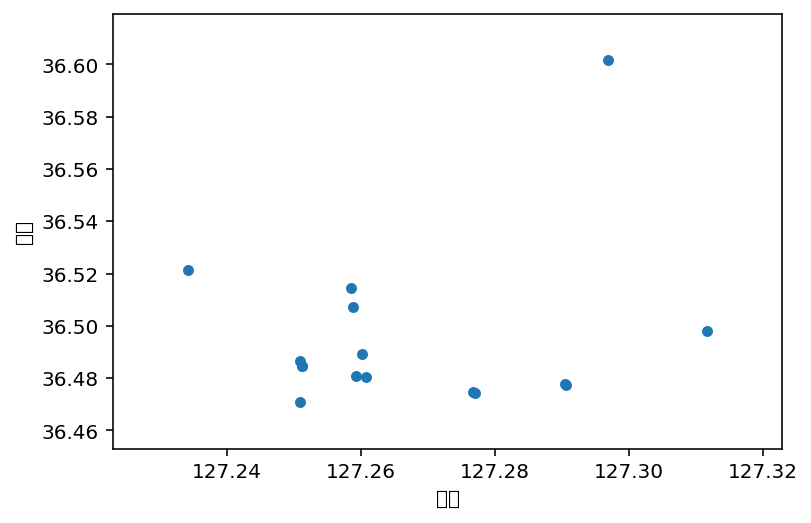

In [10]:
df_31.plot.scatter(x='경도', y='위도')


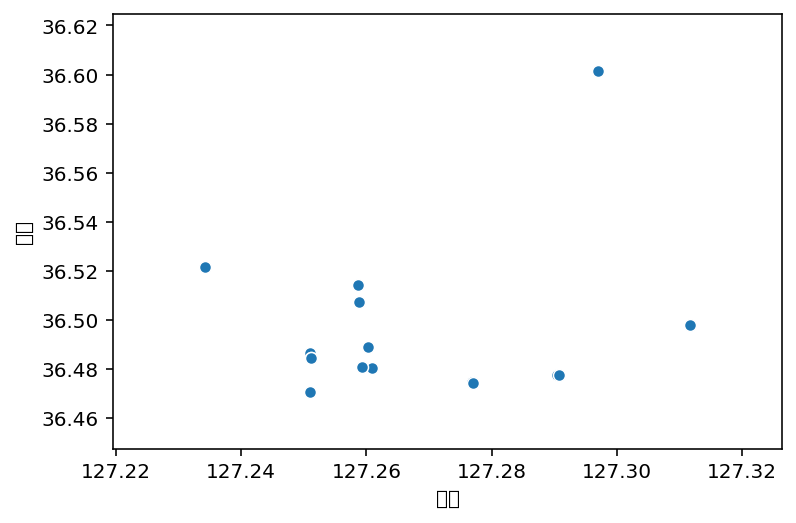

In [13]:
sns.scatterplot(data=df_31, x='경도', y='위도')

In [15]:
df_31['브랜드명'] = ''
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
942,배스킨라빈스,배스킨라빈스
1206,배스킨라빈스31,배스킨라빈스
1506,배스킨라빈스31,배스킨라빈스
1507,배스킨라빈스31,배스킨라빈스
1560,던킨도너츠,던킨도너츠


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50948 missing from current fon

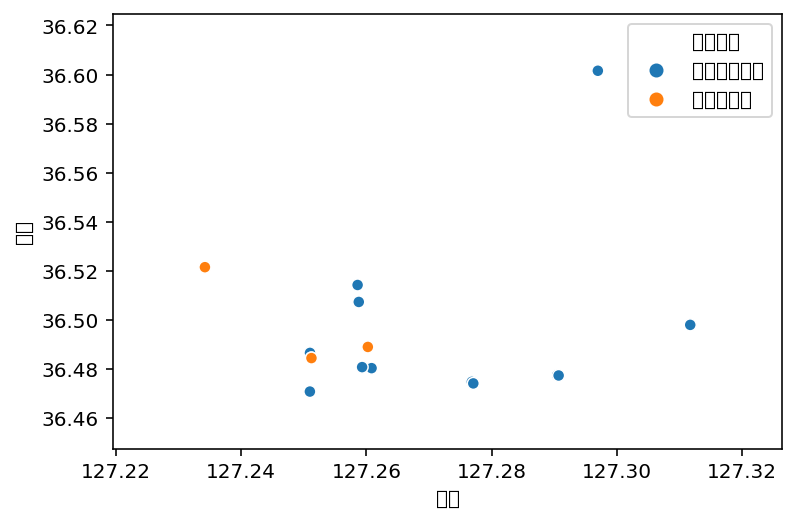

In [16]:
sns.scatterplot(data=df_31, x='경도', y='위도', hue="브랜드명")

In [20]:
geo_df = df_31.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles="OpenStreetMap")

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'pink'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [22]:
n = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# add marker one by one on the map
for i in range(0,len(data)):
    html=f"""
        <h1> {data.iloc[i]['브랜드명']}</h1>
        <p>You can use any html here! Let's do a list:</p>
        <ul>
            <li>Item 1</li>
            <li>Item 2</li>
        </ul>
        </p>
        <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p>
        """
    iframe = folium.IFrame(html=html, width=200, height=200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
        popup=popup,
        icon=folium.DivIcon(html=f"""
            <div><svg>
                <circle cx="50" cy="50" r="40" fill="#69b3a2" opacity=".4"/>
                <rect x="35", y="35" width="30" height="30", fill="red", opacity=".3" 
            </svg></div>""")
    ).add_to(n)

# Show the map again
n

NameError: name 'data' is not defined